# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

This notebook provides an introduction to exploring and analyzing data from Dandiset 001361, version 0.250406.0045, available on the DANDI Archive.

**Please note:** This notebook was generated by an AI and has not been fully verified by a human expert. It is intended as a starting point for exploring the data. Users should exercise caution when interpreting the code, results, and any commentary. Always validate findings and adapt the code as needed for your specific research questions.

## Dandiset Overview

This Dandiset, titled "A flexible hippocampal population code for experience relative to reward", contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data were collected as part of a study investigating how hippocampal place cell activity encodes sequences of events relative to reward.

You can find more information about this Dandiset on the DANDI Archive at:
https://dandiarchive.org/dandiset/001361/0.250406.0045

## Notebook Summary

This notebook will guide you through:
1. Connecting to the DANDI Archive to access Dandiset metadata and assets.
2. Loading a specific NWB file from the Dandiset using the DANDI API and PyNWB.
3. Exploring the structure and contents of the selected NWB file.
4. Visualizing example behavioral and optical physiology (ophys) data from the NWB file.

## Required Packages

To run this notebook, you will need the following Python packages:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`
- `scipy`

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn theme for better aesthetics
sns.set_theme()

## Loading the Dandiset and Listing Assets

We first connect to the DANDI archive and retrieve information about the Dandiset. We can then list the assets (files) contained within it.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Loading a Specific NWB File

Dandiset 001361 contains several NWB files with behavioral and ophys data. For this notebook, we will focus on the file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`. We will load this file directly from the Dandi Archive using its asset URL.

In [3]:
# Define the URL for the NWB file asset
nwb_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
print(f"Loading NWB file from: {nwb_url}")

# Load the NWB file without downloading the entire file
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the loaded NWB file
print("\nNWB file loaded successfully. Basic metadata:")
print(f"  Session Description: {nwb.session_description}")
print(f"  Identifier: {nwb.identifier}")
print(f"  Session Start Time: {nwb.session_start_time}")
print(f"  Subject ID: {nwb.subject.subject_id}")
print(f"  Species: {nwb.subject.species}")

# Note: We avoid printing the entire nwb object as it can produce a large output.

Loading NWB file from: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully. Basic metadata:
  Session Description: processed suite2p data
  Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
  Session Start Time: 2023-02-23 00:00:00-08:00
  Subject ID: m11
  Species: Mus musculus


## NWB File Contents

The selected NWB file (`sub-m11/sub-m11_ses-03_behavior+ophys.nwb`) contains a variety of neural and behavioral data. Based on the file structure, the main data interfaces include:

*   **Acquisition**:
    *   `TwoPhotonSeries`: Raw 2-photon imaging data (Note: accessing the full data is computationally intensive).

*   **Processing**:
    *   `behavior`: Contains various behavioral time series data.
        *   `BehavioralTimeSeries`: Includes `TimeSeries` objects for:
            *   `Reward` (reward delivery)
            *   `autoreward` (automatic reward status)
            *   `environment` (virtual reality environment)
            *   `lick` (cumulative lick detection)
            *   `position` (position on linear track)
            *   `reward_zone` (reward zone entry)
            *   `scanning` (ophys scanning status)
            *   `speed` (subject speed)
            *   `teleport` (trial end indicator)
            *   `trial number` (trial number)
            *   `trial_start` (trial start indicator)
    *   `ophys`: Contains processed optical physiology data.
        *   `Backgrounds_0`: Includes image data like `Vcorr`, `max_proj`, and `meanImg`.
        *   `Deconvolved`: Contains deconvolved calcium traces (`plane0`).
        *   `Fluorescence`: Contains raw fluorescence traces (`plane0`).
        *   `ImageSegmentation`: Contains spatial masks for identified ROIs (`PlaneSegmentation`).
        *   `Neuropil`: Contains neuropil fluorescence traces (`plane0`).

This structure indicates that the file includes both the raw imaging data, processed calcium traces, and detailed behavioral recordings, allowing for integrated analysis of neural activity and behavior during the virtual reality task.

## Exploring behavioral data: position and speed

Let's visualize the subject's position and speed over time from the behavioral data.

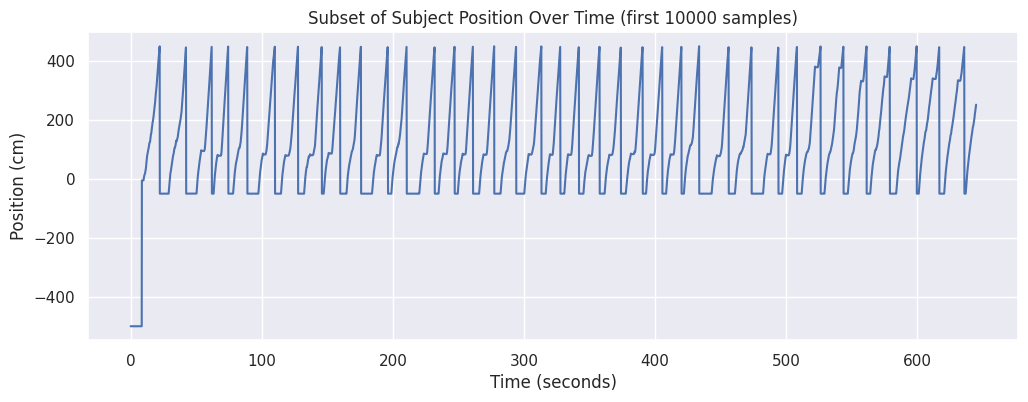

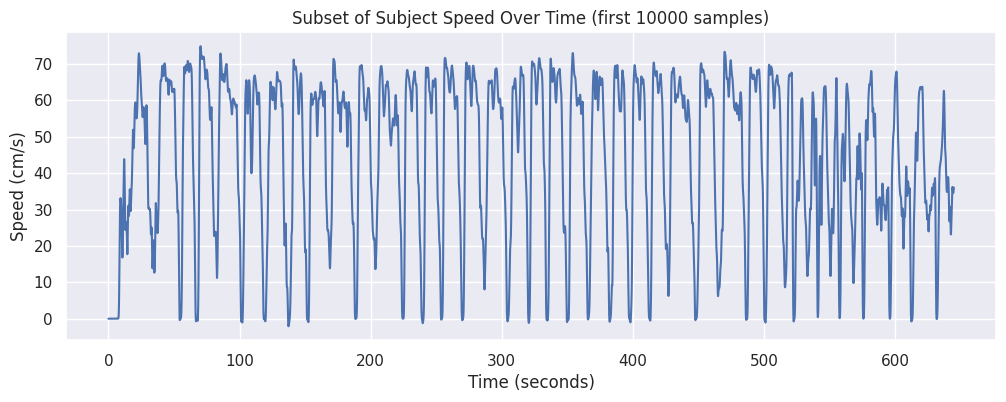

In [4]:
# Access the behavioral time series data
behavioral_time_series = nwb.processing['behavior']['BehavioralTimeSeries'].time_series

# Get position and speed data
position = behavioral_time_series['position']
speed = behavioral_time_series['speed']

# Load a subset of data to avoid excessive memory usage and network transfer
num_samples = 10000
position_data = position.data[:num_samples]
position_timestamps = position.timestamps[:num_samples]
speed_data = speed.data[:num_samples]
speed_timestamps = speed.timestamps[:num_samples]

# Plot position over time
plt.figure(figsize=(12, 4))
plt.plot(position_timestamps, position_data)
plt.xlabel(f'Time ({position.timestamps_unit})')
plt.ylabel(f'Position ({position.unit})')
plt.title(f'Subset of Subject Position Over Time (first {num_samples} samples)')
plt.grid(True)
plt.show()

# Plot speed over time
plt.figure(figsize=(12, 4))
plt.plot(speed_timestamps, speed_data)
plt.xlabel(f'Time ({speed.timestamps_unit})')
plt.ylabel(f'Speed ({speed.unit})')
plt.title(f'Subset of Subject Speed Over Time (first {num_samples} samples)')
plt.grid(True)
plt.show()

## Exploring ophys data: Fluorescence traces and ROI masks

Now let's look at some optical physiology data. We will visualize the fluorescence traces for a subset of ROIs and the spatial masks for the identified ROIs.

In [5]:
# Access the ophys processing module
ophys_module = nwb.processing['ophys']

# Get fluorescence data
fluorescence_series = ophys_module['Fluorescence']['roi_response_series']['plane0']

# Get image segmentation data (for ROI masks)
image_segmentation = ophys_module['ImageSegmentation']['plane_segmentations']['PlaneSegmentation']

# Load a subset of fluorescence traces for visualization
num_rois_to_plot = 10
num_time_points = 1000
fluorescence_data_subset = fluorescence_series.data[:num_time_points, :num_rois_to_plot]
fluorescence_timestamps_subset = fluorescence_series.timestamps[:num_time_points]

# Plot fluorescence traces for a subset of ROIs
plt.figure(figsize=(12, 6))
for i in range(num_rois_to_plot):
    plt.plot(fluorescence_timestamps_subset, fluorescence_data_subset[:, i] + i * 50, label=f'ROI {i}') # Offset traces for clarity
plt.xlabel(f'Time ({fluorescence_series.timestamps_unit})')
plt.ylabel(f'Fluorescence ({fluorescence_series.unit}, offset for clarity)')
plt.title(f'Subset of Fluorescence Traces for {num_rois_to_plot} ROIs')
plt.grid(True)
plt.show()

# Visualize the spatial masks for the same subset of ROIs
# We will use the 'pixel_mask' which contains the coordinates and intensity of the pixels for each ROI
roi_masks = image_segmentation.get_roi_pixel_masks()

# Assuming 'meanImg' exists and has the same dimensions as the imaging plane
# We can load the mean image to plot the masks on top of it
# Check if meanImg exists in the Backgrounds_0 images
mean_img = None
if 'Backgrounds_0' in ophys_module.data_interfaces and 'meanImg' in ophys_module['Backgrounds_0'].images:
     mean_img = ophys_module['Backgrounds_0'].images['meanImg'].data[:]

plt.figure(figsize=(8, 8))
if mean_img is not None:
    plt.imshow(mean_img, cmap='gray')
    plt.title('Mean Image with ROI Masks')
else:
    plt.title('ROI Masks (Mean image not available)')

# Plot the masks for the subset of ROIs
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

ax = plt.gca()
polygons = []
colors = []
for i in range(num_rois_to_plot):
    if i &lt; len(roi_masks):
        mask = roi_masks[i]
        # A mask is a list of (x, y, value) tuples. We only need x and y for the polygon.
        # We can simplify this by just taking the boundary points or using the extent of the mask
        # For simplicity, let's use a convex hull or just plot the points.
        # A simple approach is to plot the pixels with value > 0
        if len(mask) > 0:
            # Plot individual pixels of the mask
            y_coords = [m[1] for m in mask if m[2] > 0]
            x_coords = [m[0] for m in mask if m[2] > 0]
            ax.scatter(x_coords, y_coords, s=1, label=f'ROI {i}', alpha=0.5)

# Note: A more sophisticated approach would be to draw polygons or use a heatmap for overlapping masks.
# For clarity and simplicity as requested, plotting individual pixels with a transparency might be sufficient.

plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis() # Invert y-axis to match image coordinates
plt.show()

SyntaxError: invalid syntax (4251342164.py, line 52)

## Link to Neurosift

You can explore this specific NWB file interactively on Neurosift using the link below:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&amp;dandisetId=001361&amp;dandisetVersion=0.250406.0045

## Summary and Future Directions

This notebook demonstrated how to access and perform basic visualization of behavioral and optical physiology data from a specific NWB file in Dandiset 001361. We were able to load position, speed, and fluorescence traces, as well as visualize the spatial masks of identified neurons.

Possible future directions for analysis with this Dandiset could include:
- Analyzing the relationship between neuronal activity and behavior (e.g., how fluorescence correlates with position or speed).
- Performing detailed analysis of the spatial tuning of neurons (place cells).
- Investigating how neuronal activity changes over trials or learning phases.
- Utilizing the deconvolved calcium traces for studying spiking activity.
- Exploring the other NWB files in the Dandiset to compare data across different subjects or sessions.

Remember to consult the Dandiset metadata and any associated publications for more context and details about the data and experimental design.